In [18]:
import codecs
import numpy as np
import pandas as pd
import re
import os

from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import wordpunct_tokenize
from nltk.stem import * 
from nltk.stem.snowball import SnowballStemmer 
from nltk.stem import WordNetLemmatizer
import nltk.classify.util
from nltk.classify import NaiveBayesClassifier

from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn import svm, datasets, tree
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('D:\\Internet.csv')
df.head()
data1 = df[["Sent", "Eval"]] 
som = data1[data1['Eval'] == 'som']
pos = data1[data1['Eval'] == 'pos']
neg = data1[data1['Eval'] == 'neg']
data1.groupby('Eval').describe()

som_data = []
pos_data = []
neg_data = []

for i in som.stack().value_counts(): 
    som_data.append(i)
for i in pos.stack().value_counts():
    pos_data.append(i)
for i in neg.stack().value_counts():
    neg_data.append(i)
#print("som", som.stack().value_counts())
#print("pos", pos.stack().value_counts())
#print("neg", neg.stack().value_counts())

In [19]:
train_set = pd.concat([som[:250], pos[:250], neg[:250]], ignore_index = True)
test_set = pd.concat([som[251:310], pos[251:310], neg[251:310]], ignore_index = True)
train_set.groupby('Eval').describe()

x_train = list(train_set['Sent'])
y_train = np.array(train_set['Eval'])
x_test = list(test_set['Sent'])
y_test = np.array(test_set['Eval'])

In [28]:
def word_feats(words):
    return dict([(word, True) for word in words])

somids = data1[data1['Eval'] == 'som']
posids = data1[data1['Eval'] == 'pos']
negids = data1[data1['Eval'] == 'neg']
 
negfeats = [(word_feats(df.words(fileids=[f])), 'neg') for f in negids]
posfeats = [(word_feats(df.words(fileids=[f])), 'pos') for f in posids]
 
trainfeats = som[:250] + pos[:250] + neg[:250]
testfeats = som[251:310] + pos[251:310] + neg[251:310]

classifier = NaiveBayesClassifier.train(trainfeats)
print ('accuracy:', nltk.classify.util.accuracy(classifier, testfeats))
classifier.show_most_informative_features()

AttributeError: 'DataFrame' object has no attribute 'words'

In [14]:
def plot_confusion_matrix(cm, classes, #Функция из документации sklearn
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.


Count Vectorizer
             precision    recall  f1-score   support

        som       0.57      0.66      0.61        59
        pos       0.59      0.51      0.55        59
        neg       0.60      0.59      0.60        59

avg / total       0.59      0.59      0.59       177

Confusion matrix, without normalization
[[39  8 12]
 [18 30 11]
 [11 13 35]]
Tf-idf
             precision    recall  f1-score   support

        som       0.57      0.64      0.60        59
        pos       0.57      0.56      0.56        59
        neg       0.65      0.58      0.61        59

avg / total       0.60      0.59      0.59       177

Confusion matrix, without normalization
[[38 12  9]
 [17 33  9]
 [12 13 34]]


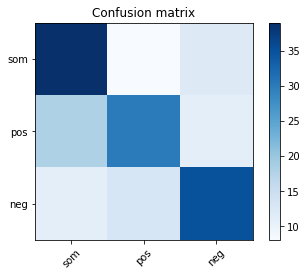

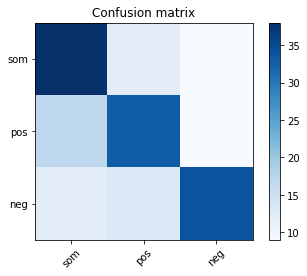

In [29]:
def tokenize(text):
    text = text.lower()
    return word_tokenize(text)

def tokenize_wo_punkt(text): #Токенизация без пунктуации
    return word_tokenize(re.sub("[.,!?\(\)\-\:\;\'\"]", "", text.lower())) 

def nb_classif(bow): #Функция для рассчета по наивному Байесу
    nb_model = MultinomialNB()
    b_train = bow.fit_transform(x_train) 
    nb_model.fit(b_train, y_train)
    b_test = bow.transform(x_test)
    predict = nb_model.predict(b_test)
    matrix = confusion_matrix(y_test, predict)
#    print("\n", vect_type, m_type)
    print(classification_report(y_test, predict, target_names=['som', 'pos', 'neg']))
    plt.figure()
#    print("\n", vect_type, m_type)
    plot_confusion_matrix(matrix, classes=['som', 'pos', 'neg'])
    
bow = CountVectorizer(analyzer=tokenize_wo_punkt)
print ('Count Vectorizer')
nb_classif(bow)
bow = TfidfVectorizer(analyzer=tokenize_wo_punkt)
print('Tf-idf')
nb_classif(bow)


In [106]:
def file_names():
    path_f = [] 
    for d, dirs, files in os.walk('d:\Files_txt'): 
        for f in files: 
            path = os.path.join(d,f) # формирование адреса 
            path_f.append(path) # добавление адреса в список 
    return(path_f)

In [107]:
def get_files():
    text = ''
    for file in file_names():
        f = codecs.open(file, 'r', 'utf-8')
        for j in f:
            text = text + j
    return text 

In [108]:
def tokenize_wo_punkt(text): #Токенизация без пунктуации
#    text = text.lower()
    return word_tokenize(re.sub("[.,!?\(\)\-\:\;\'\"\n\r]", "", text.lower()))

In [109]:
def i_bigram(input_list):
    bigram_list = []    
    for i in range(len(input_list)-1):
        if re.search(u'интернет', input_list[i]) != None:
            bigram_list.append((input_list[i], input_list[i+1]))
            bigram_list.append((input_list[i-1], input_list[i]))
    return bigram_list

In [110]:
def bigram(input_list):
    bigram_list = []    
    for i in range(len(input_list)-1):
            bigram_list.append((input_list[i], input_list[i+1]))
    return bigram_list

In [111]:
def sent_split(text):
    split = text.split('.')
    return(split)   
    


В результате глобализации экономики и развития Интернета покупки теперь можно совершать, невзирая на границы
 Если бы вам нужно было в обмен на некую единовременно предоставляемую сумму сбережений обеспечить себе постоянный денежный доход, то что бы вы сделали?
А фондовый рынок? Lucent Technologies, основной поставщик компьютерного оборудования для Интернета и любимчик фондового рынка, за 12 месяцев, предшествовавших сентябрю 1999 года, обеспечила доход на капитал в размере почти 80%
 Плюс появление Интернета подготавливает публику здесь
 Может быть, даже эти деньги не удастся "отбить", если перспективы Интернета окажутся менее радужными
 Может быть, в итоге Интернет в сегодняшнем его виде и окажется "пустышкой", зато какое-нибудь другое направление окупит все затраты, в том числе и на Интернет, механизм-то уже запущен
 Появятся толпы издателей и интернетовских авантюристов, которые будут эксплуатировать все более заманчивый испаноязычный рынок
 Имеют свои газеты, журналы, музыку, клу

In [ ]:
#    get_files()
#    text = ''
#    f = codecs.open('d:\\Texts\\Ельцин СОФЬЯ\\пиковые дни\\15.01.2000\\15-18.01.2000, 11-20.txt', 'r', 'utf-8')
#    for j in f:
#        text = text + j
#    text = get_files()
#    sent = sent_split(text)
#    w = codecs.open('d:\\Internet_Sent.csv', 'w', 'utf-8')
#    for s in sent:
#        if re.search(u'[Ии]нтернет', s) != None:
#            print(s)
#            w.write(re.sub("[.,!?\(\)\-\:\;\'\"\n\r]", "", s) + ';\n')
    
        

#    words = tokenize_wo_punkt(text)
#    bigrams = bigram(words)
#    print(bigrams)
#    i_bigrams = i_bigram(words)
#    print(i_bigrams)

Порезать на предложения, разметить, попробовать пообучать
Всякие стоп-слова и тп